In [ ]:
!unzip "/content/drive/MyDrive/07012018.zip" -d "/content/" 

In [ ]:
file = open("/content/data.txt")

In [ ]:
data = file.readlines()

In [ ]:
data = [x.split(" ")[1] for x in data]

In [ ]:
data = [x.split(",")[0] for x in data]

In [ ]:
data = list(map(float,data))

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


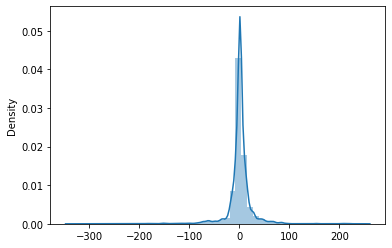

In [ ]:
sns.distplot(data)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns = ["File_name","angle"])

In [ ]:
file = open("/content/data.txt")
data = file.readlines()

In [ ]:
data[:10]

['0.jpg 0.000000,2018-07-01 17:09:44:912\n',
 '1.jpg 0.000000,2018-07-01 17:09:44:972\n',
 '2.jpg 0.000000,2018-07-01 17:09:45:11\n',
 '3.jpg 0.000000,2018-07-01 17:09:45:76\n',
 '4.jpg 0.000000,2018-07-01 17:09:45:105\n',
 '5.jpg 0.000000,2018-07-01 17:09:45:145\n',
 '6.jpg 0.000000,2018-07-01 17:09:45:205\n',
 '7.jpg 0.000000,2018-07-01 17:09:45:246\n',
 '8.jpg 0.000000,2018-07-01 17:09:45:301\n',
 '9.jpg 0.000000,2018-07-01 17:09:45:341\n']

In [ ]:
file_names = [x.split(" ")[0] for x in data] 

In [ ]:
angles = [x.split(" ")[1] for x in data]

In [ ]:
angles = [x.split(",")[0] for x in angles]

In [ ]:
angles = list(map(float,angles))

In [ ]:
df.File_name = file_names

In [ ]:
df.angle = angles

In [ ]:
df.head()

,File_name,angle
0,0.jpg,0.0
1,1.jpg,0.0
2,2.jpg,0.0
3,3.jpg,0.0
4,4.jpg,0.0


In [ ]:
pi = 22/7
def degrees_rads(x):
  x = float((x)*pi/180)
  return x

In [ ]:
df.angle = df.angle.map(degrees_rads)

In [ ]:
df.to_csv("data_file.csv")

In [ ]:
# simple mean model

split = 0.8

X =[]
y =[]

In [ ]:
import numpy as np

In [ ]:
y = np.array(df.angle)

In [ ]:
y

array([ 0.        ,  0.        ,  0.        , ..., -0.19712698,
       -0.19712698, -0.19712698])

In [ ]:
split_index = int(len(y)*0.8)

In [ ]:
train_y =y[:split_index]
test_y = y[split_index:]

In [ ]:
#mean model
y_test_pred = np.mean(train_y)

In [ ]:
y_test_pred

0.015270005220344565

In [ ]:
import matplotlib.pyplot as plt

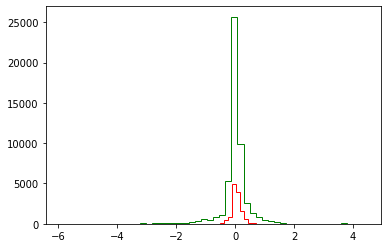

In [ ]:
plt.hist(train_y,bins=50,color="green",histtype="step")
plt.hist(test_y,bins=50,color="red",histtype="step")
plt.show()

In [ ]:
print("MSE (MEAN MODEL) is " + str(np.mean(np.square(test_y-y_test_pred))))

MSE (MEAN MODEL) is 0.0905898860902429


In [ ]:
print("MSE (ZERO CONSTANT MODEL) is " + str(np.mean(np.square(test_y-0))))

MSE (ZERO CONSTANT MODEL) is 0.09184150655669693


In [ ]:
xs=[]
ys=[]

In [ ]:
#points to the end of the last batch
train_batch_pointer =0
val_batch_pointer = 0

In [ ]:
#read data

for x in range(len(df)):
  xs.append("/content/data/" + str(df.File_name.iloc[x]))
  ys.append(df.angle[x])


In [ ]:
num_images = len(xs)

In [ ]:
train_xs = xs[:int(len(xs)*0.8)]

train_ys = ys[:int(len(xs)*0.8)]

In [ ]:
val_xs = xs[-int(len(xs)*0.2):]

val_ys = ys[-int(len(xs)*0.2):]

In [ ]:
num_train_images=len(train_xs)

In [ ]:
num_val_images = len(val_xs)

In [ ]:
import cv2

In [ ]:
def LoadTrainBatch(batch_size):
  global train_batch_pointer
  x_out =[]
  y_out =[]
  for i in range(0,batch_size):
    x_out.append(cv2.resize(cv2.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], (200, 66)) / 255.0)
    y_out.append([train_ys[(train_batch_pointer + i) % num_train_images]])
  train_batch_pointer += batch_size
  return x_out,y_out

In [ ]:
def LoadValBatch(batch_size):
  global val_batch_pointer
  x_out =[]
  y_out =[]
  for i in range(0,batch_size):
    x_out.append(cv2.resize(cv2.imread(val_xs[(val_batch_pointer + i) % num_val_images])[-150:], (200, 66)) / 255.0)
    y_out.append([val_ys[(val_batch_pointer + i) % num_val_images]])
  val_batch_pointer += batch_size
  return x_out,y_out

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
#Model architecture

model = Sequential()

model.add(BatchNormalization(epsilon=0.001,trainable=False, axis=3,input_shape=(66,200,3)))

model.add(Conv2D(24,(5,5),padding='valid', activation='relu', strides=(2,2)))
model.add(Conv2D(36,(5,5),padding='valid', activation='relu', strides=(2,2)))
model.add(Conv2D(48,(5,5),padding='valid', activation='relu', strides=(2,2)))
model.add(Conv2D(64,(3,3),padding='valid', activation='relu', strides=(1,1)))
model.add(Conv2D(64,(3,3),padding='valid', activation='relu', strides=(1,1)))
model.add(Flatten())
model.add(Dense(1164, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='tanh'))



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 66, 200, 3)       12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                        

In [ ]:
adam = Adam(learning_rate=0.0001)
model.compile(loss='mse',
              optimizer=adam
              )

In [ ]:
epochs = 30

In [ ]:
batch_size = 100

In [ ]:
for epoch in range(epochs):
  print(str(epoch+1)+" Epoch")
  for i in range(num_train_images//100):
    train_x,train_y = LoadTrainBatch(batch_size)
    train_x = np.array(train_x)
    train_y = np.array(train_y)
    model.fit(train_x,train_y,verbose=0)
    print(str(model.history.history["loss"][0])+ " : Loss for Batch-> " + str(i+1))   
    if i%10==0:
      val_x,val_y = LoadValBatch(batch_size)
      val_x = np.array(val_x)
      val_y = np.array(val_y)
      val_loss = model.evaluate(val_x,val_y,verbose=0)
      print(str(val_loss) + " : Val Loss after training " + str(i+1)+" batche(s)")
    model.save("saved_model.h5")

      

Streaming output truncated to the last 5000 lines.
0.004520346410572529 : Loss for Batch-> 52
0.018866682425141335 : Loss for Batch-> 53
0.018003204837441444 : Loss for Batch-> 54
0.004694061353802681 : Loss for Batch-> 55
0.0003892533131875098 : Loss for Batch-> 56
0.009947068057954311 : Loss for Batch-> 57
0.0747578889131546 : Loss for Batch-> 58
0.22905398905277252 : Loss for Batch-> 59
0.23879310488700867 : Loss for Batch-> 60
0.03340647369623184 : Loss for Batch-> 61
0.011912508867681026 : Val Loss after training 61 batche(s)
0.0852825865149498 : Loss for Batch-> 62
0.053461551666259766 : Loss for Batch-> 63
0.10095419734716415 : Loss for Batch-> 64
0.06141970679163933 : Loss for Batch-> 65
0.08882547169923782 : Loss for Batch-> 66
0.029049301519989967 : Loss for Batch-> 67
0.011811021715402603 : Loss for Batch-> 68
0.011768016964197159 : Loss for Batch-> 69
0.01035241037607193 : Loss for Batch-> 70
0.010822744108736515 : Loss for Batch-> 71
0.00835160817950964 : Val Loss after tr

In [ ]:
model.save("saved_model.h5")

In [ ]:
val_x,val_y = LoadValBatch(batch_size)
val_x = np.array(val_x)
val_y = np.array(val_y)

In [ ]:
y_pred = model.predict(val_x)

In [ ]:
y_pred = np.array(y_pred)

In [ ]:
y_pred.shape

(100, 1)

In [ ]:
y_pred = y_pred.reshape((1,100))

In [ ]:
val_y = val_y.reshape((1,100))

In [ ]:
y_pred

array([[0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01506504, 0.01506504,
        0.01506504, 0.01506504, 0.01506504, 0.01

In [ ]:
val_y

array([[ 0.00873016,  0.01065079,  0.01065079,  0.01065079,  0.01239683,
         0.01239683,  0.01239683,  0.01239683,  0.01239683,  0.01239683,
         0.01239683,  0.01239683,  0.01239683,  0.01239683,  0.01239683,
         0.01239683,  0.01239683,  0.01414286,  0.01763492,  0.02461905,
         0.03526984,  0.04225397,  0.04574603,  0.04574603,  0.        ,
         0.0387619 ,  0.0387619 ,  0.0387619 ,  0.0387619 ,  0.0387619 ,
         0.04050794,  0.044     ,  0.04574603,  0.04574603,  0.044     ,
         0.04225397,  0.0387619 ,  0.03352381,  0.03177778,  0.02636508,
         0.02112698,  0.01414286,  0.01239683,  0.00873016,  0.00698413,
         0.00698413,  0.00349206,  0.00349206,  0.00174603,  0.        ,
        -0.00698413, -0.01414286, -0.02112698, -0.02985714, -0.0387619 ,
        -0.04050794, -0.04050794, -0.04050794, -0.04050794, -0.04050794,
        -0.04050794, -0.04050794, -0.04050794, -0.04050794, -0.04050794,
        -0.04050794, -0.04050794, -0.04050794, -0.0